In [1]:
import matplotlib.pyplot as plt
import numpy as np


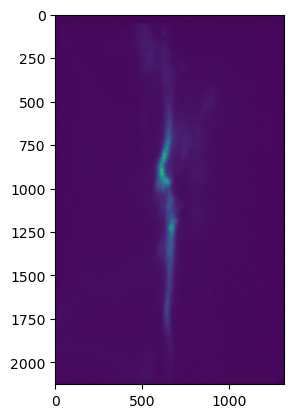

In [2]:
fname = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Data/MARZ/Figures_POP/z3778_ARPC-R_2.IPH copy.png'
img = plt.imread(fname);

plt.imshow(img)

FWHM = 54.8 px, 1.7 mm
FWHM = 54.3 px, 1.7 mm
FWHM = 39.0 px, 1.2 mm
FWHM = 37.4 px, 1.1 mm
FWHM = 79.3 px, 2.4 mm
FWHM = 60.5 px, 1.9 mm
FWHM = 49.5 px, 1.5 mm
FWHM = 52.9 px, 1.6 mm
FWHM = 52.9 px, 1.6 mm
FWHM = 40.0 px, 1.2 mm
FWHM = 39.0 px, 1.2 mm
mean, s.d. = 1.6 mm, 0.4 mm 


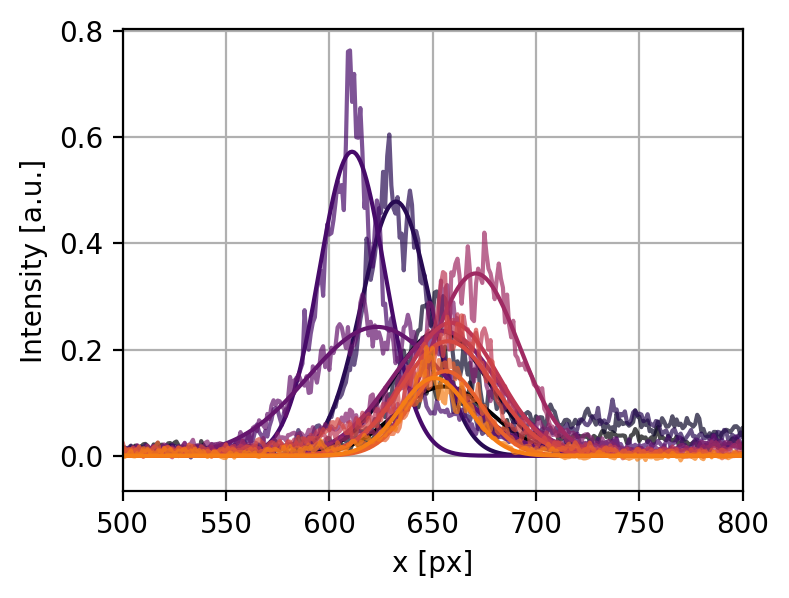

In [27]:

from scipy.optimize import curve_fit

def gaussian(x,sig,mu,A):
    return A * np.exp(-(x-mu)**2 / (2 * sig**2))

fig, axs = plt.subplots(1,1,figsize=(4,3),dpi=200)

from matplotlib import cm
cnt = 0
clr = cm.inferno(np.linspace(0,1,15))

fwhm = []
scale = 0.0307 # mm/px
for ii in range(600,1601,100):
    row_now = img[ii,:]
    row_now = row_now - np.mean(row_now[0:100])
    x = range(row_now.shape[0])
    
    # fit a gaussain to rho
    popt, pcov = curve_fit(gaussian, x, row_now, p0=[100,650,1])
    print('FWHM = %2.1f px, %2.1f mm'%(popt[0] * 2.355,popt[0] * 2.355*scale))
    fwhm.append(popt[0] * 2.355 * scale) # px
    
    plt.plot(x,row_now,color=clr[cnt],alpha=0.7)
    plt.plot(x,gaussian(x,*popt),color=clr[cnt],alpha=1)
    cnt+= 1
axs.set_xlabel('x [px]');
axs.set_xlim([500,800])
axs.set_ylabel('Intensity [a.u.]')
axs.grid()

print("mean, s.d. = %1.1f mm, %1.1f mm " %(np.mean(fwhm), np.std(fwhm)))

1.5614164842554585